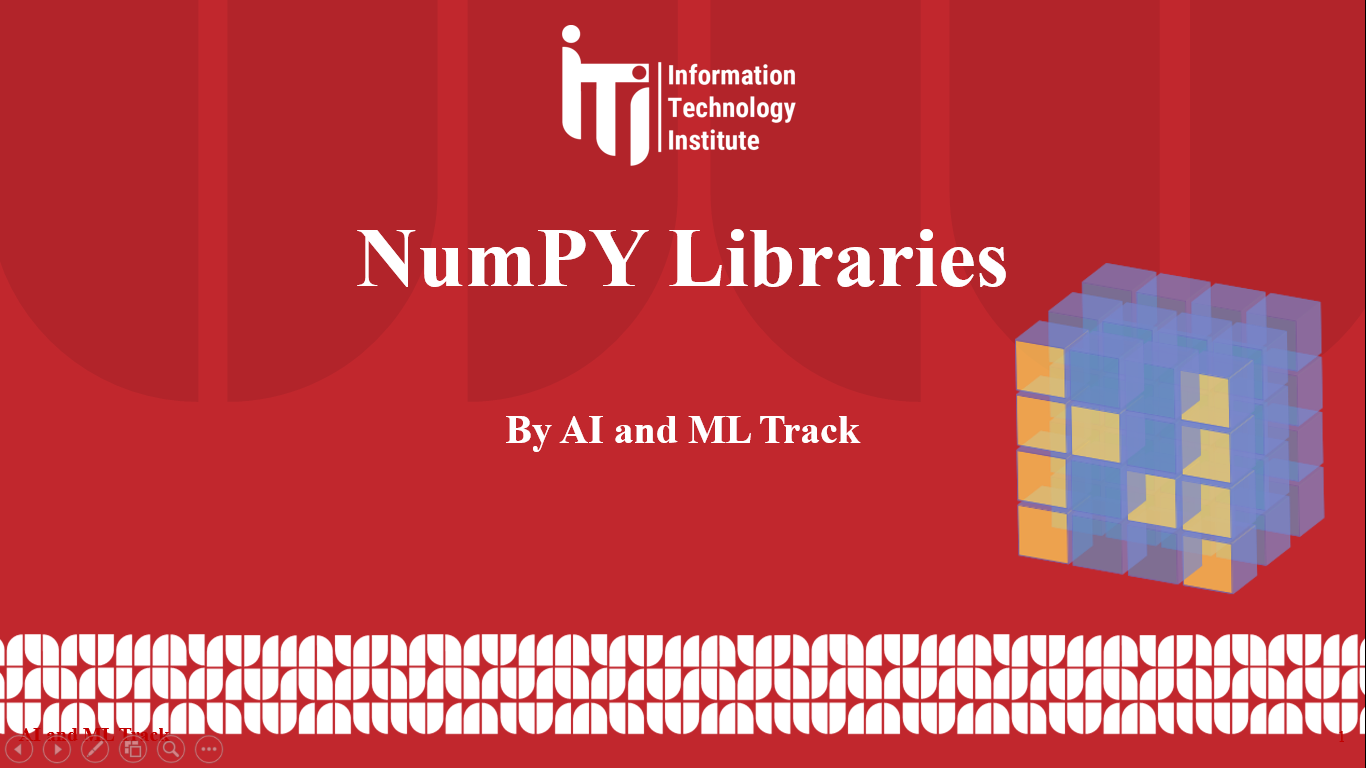

In [1]:
import numpy as np

# Broadcasting


Broadcasting is simply a set of rules for applying binary functions (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

---



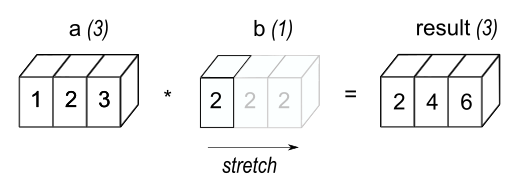

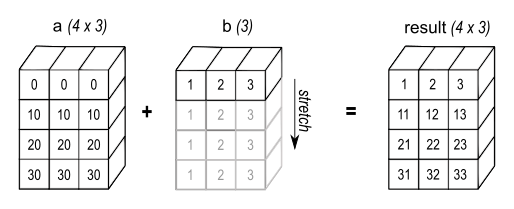

##Broadcasting example 2

In [2]:
M = np.ones((2, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.]])

In [3]:
a = np.arange(3)
a

array([0, 1, 2])

Let's consider an operation on these two arrays. The shape of the arrays are

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

We see by rule 1 that the array ``a`` has fewer dimensions, so we pad it on the left with ones:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and we see that the final shape will be ``(2, 3)``:

In [4]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

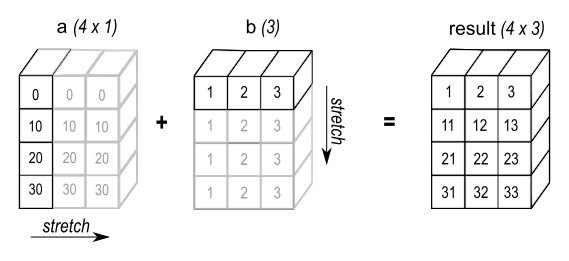

### Broadcasting example 2

Let's take a look at an example where both arrays need to be broadcast:

In [5]:
a = np.arange(3).reshape((3, 1))
a

array([[0],
       [1],
       [2]])

In [6]:
b = np.arange(3)
b

array([0, 1, 2])

Again, we'll start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1 says we must pad the shape of ``b`` with ones:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible. We can see this here:

In [7]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

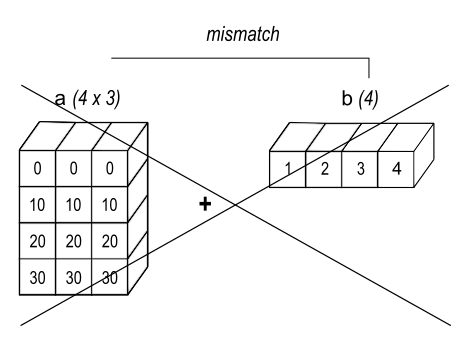

### Broadcasting example 3

Now let's take a look at an example in which the two arrays are not compatible:

In [8]:
M = np.ones((3, 2))
M


array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [9]:
a = np.arange(3)
a

array([0, 1, 2])

This is just a slightly different situation than in the first example: the matrix ``M`` is transposed.
How does this affect the calculation? The shape of the arrays are

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Again, rule 1 tells us that we must pad the shape of ``a`` with ones:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

By rule 2, the first dimension of ``a`` is stretched to match that of ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [10]:
M + a

ValueError: ignored

Note the potential confusion here: 
you could imagine making ``a`` and ``M`` compatible by, say, padding ``a``'s shape with ones on the right rather than the left.
But this is not how the broadcasting rules work!
That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity.

If right-side padding is what you'd like, you can do this explicitly by reshaping the array (use the ``np.newaxis`` ):

In [11]:
a[:, np.newaxis].shape

(3, 1)

In [12]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

# Working across axis

In [13]:
arr1D=np.arange(10)
arr1D

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
np_array_2d = np.arange(6).reshape(2,3)
print(np_array_2d)

[[0 1 2]
 [3 4 5]]


## Different Functions: sum, mean, ...

In [15]:
sum_elements=np.sum(np_array_2d)
sum_across_rows=np.sum(np_array_2d, axis = 0) #Every Column
sum_across_cols=np.sum(np_array_2d, axis = 1) #Every Row
print(sum_elements,'\n',sum_across_rows,sum_across_rows.shape,'\n',sum_across_cols,sum_across_cols.shape)

15 
 [3 5 7] (3,) 
 [ 3 12] (2,)


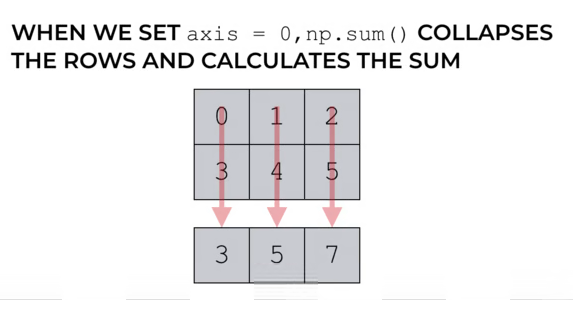

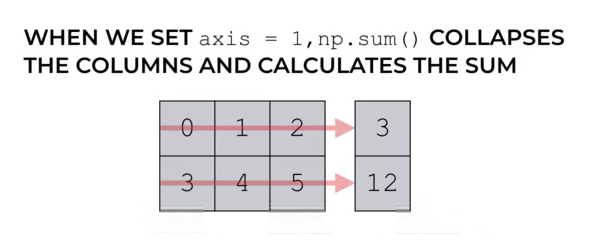

In [16]:
sum_across_cols=np.sum(np_array_2d, axis = 1, keepdims=True) #Every Row
print(sum_across_cols,sum_across_cols.shape)

[[ 3]
 [12]] (2, 1)


## In 3D

In [17]:
# Example One:
np_array_3d = np.arange(12).reshape([3,2,2])
print(np_array_3d,'\n\n')

sum_elements=np.sum(np_array_3d)
sum_across_layers=np.sum(np_array_3d,keepdims=True, axis = 0) #Every Column
sum_across_rows=np.sum(np_array_3d,keepdims=False, axis = 1) #Every Row
sum_across_cols=np.sum(np_array_3d,keepdims=True, axis = 2) #Every element in each layer
print(sum_elements,'\n\n',sum_across_rows,sum_across_rows.shape,'\n\n',sum_across_cols,sum_across_cols.shape,'\n\n',sum_across_layers,sum_across_layers.shape)

# You will find that the comments are misleading .... Every dimension has different axis = 0

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]] 


66 

 [[ 2  4]
 [10 12]
 [18 20]] (3, 2) 

 [[[ 1]
  [ 5]]

 [[ 9]
  [13]]

 [[17]
  [21]]] (3, 2, 1) 

 [[[12 15]
  [18 21]]] (1, 2, 2)


In [18]:
# Example Two:
np_array_3d = np.array([1,2,3,4,5,6,1,2,3,4,5,6]).reshape([2,2,3])
print(np_array_3d,'\n\n')

sum_elements=np.sum(np_array_3d)
sum_across_layers=np.sum(np_array_3d,keepdims=False, axis = 0) #Every Column
sum_across_rows=np.sum(np_array_3d,keepdims=False, axis = 1) #Every Row
sum_across_cols=np.sum(np_array_3d,keepdims=False, axis = 2) #Every element in each layer
print(sum_elements,'\n\n',sum_across_layers,sum_across_layers.shape,'\n\n',sum_across_rows,sum_across_rows.shape,'\n\n',sum_across_cols,sum_across_cols.shape,'\n\n')

sum_across_layers=np.sum(np_array_3d,keepdims=True, axis = 0) #Every Column
sum_across_rows=np.sum(np_array_3d,keepdims=True, axis = 1) #Every Row
sum_across_cols=np.sum(np_array_3d,keepdims=True, axis = 2) #Every element in each layer
print('\n\n',sum_across_layers,sum_across_layers.shape,'\n\n',sum_across_rows,sum_across_rows.shape,'\n\n',sum_across_cols,sum_across_cols.shape,'\n\n')


# You will find that the comments are misleading .... Every dimension has different axis = 0

[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]] 


42 

 [[ 2  4  6]
 [ 8 10 12]] (2, 3) 

 [[5 7 9]
 [5 7 9]] (2, 3) 

 [[ 6 15]
 [ 6 15]] (2, 2) 




 [[[ 2  4  6]
  [ 8 10 12]]] (1, 2, 3) 

 [[[5 7 9]]

 [[5 7 9]]] (2, 1, 3) 

 [[[ 6]
  [15]]

 [[ 6]
  [15]]] (2, 2, 1) 




In [19]:
sum_across_cols=np.sum(np_array_3d, axis = 2, keepdims=True)
sum_across_cols


array([[[ 6],
        [15]],

       [[ 6],
        [15]]])

In [20]:
# Example Three
np_array_3d=np_array_3d+np.zeros([2,2,3])
print(np_array_3d,'\n\n')

sum_elements=np.sum(np_array_3d)
sum_across_rows=np.sum(np_array_3d, axis = 0) 
sum_across_cols=np.sum(np_array_3d, axis = 1) 
sum_across_layers=np.sum(np_array_3d, axis = 2) 
print(sum_elements,'\n\n',sum_across_rows,sum_across_rows.shape,'\n\n',sum_across_cols,sum_across_cols.shape,'\n\n',sum_across_layers,sum_across_layers.shape)

[[[1. 2. 3.]
  [4. 5. 6.]]

 [[1. 2. 3.]
  [4. 5. 6.]]] 


42.0 

 [[ 2.  4.  6.]
 [ 8. 10. 12.]] (2, 3) 

 [[5. 7. 9.]
 [5. 7. 9.]] (2, 3) 

 [[ 6. 15.]
 [ 6. 15.]] (2, 2)


# Concatenate and Append


## Concatenate

In [21]:
np_array_1s = np.array([[1,1,1],[1,1,1]])
np_array_9s = np.array([[9,9,9],[9,9,9]])

In [22]:
np.concatenate([np_array_1s, np_array_9s], axis = 0)

array([[1, 1, 1],
       [1, 1, 1],
       [9, 9, 9],
       [9, 9, 9]])

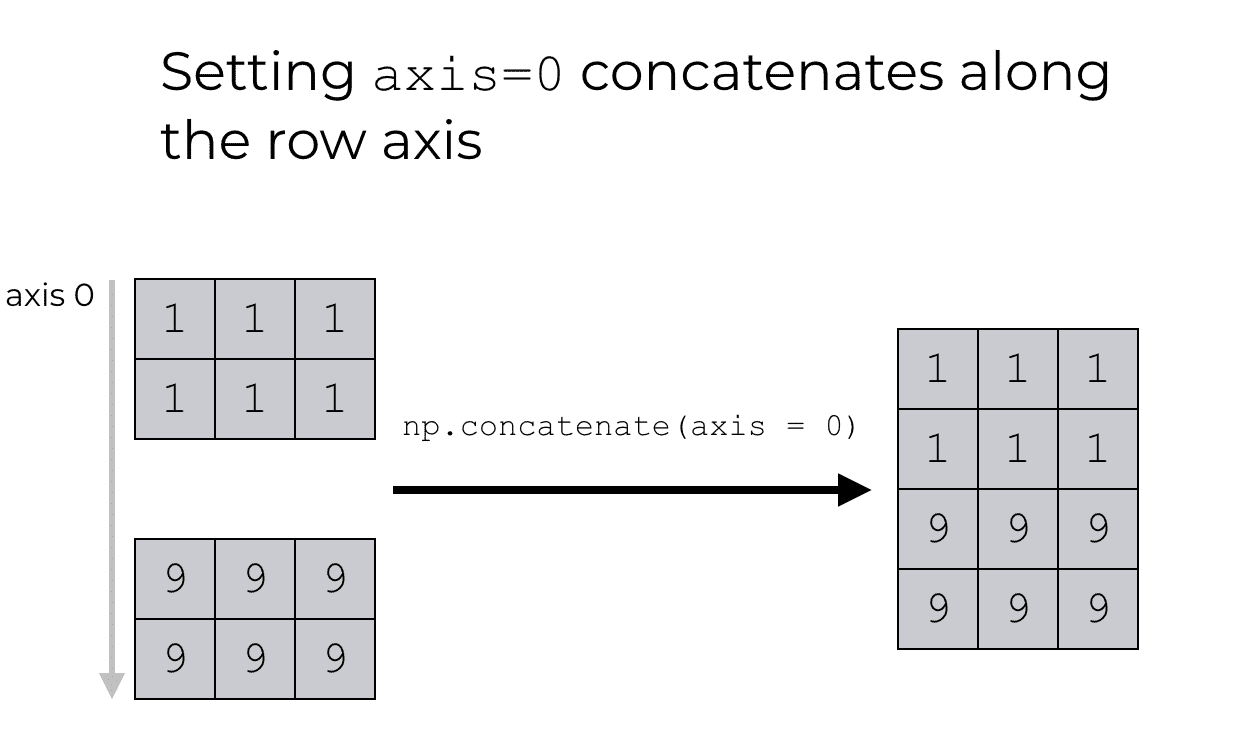

In [23]:
np.concatenate([np_array_1s, np_array_9s], axis = 1)

array([[1, 1, 1, 9, 9, 9],
       [1, 1, 1, 9, 9, 9]])

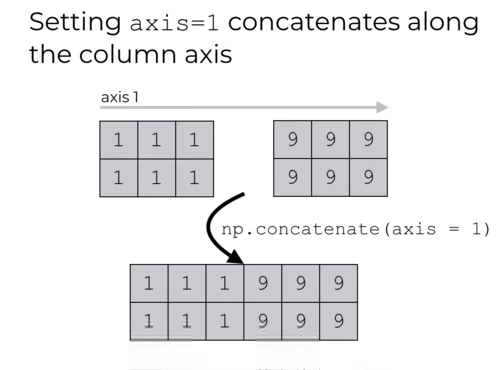

The fact that 1-d arrays have only one axis can cause some results that confuse NumPy beginners.

In [24]:
np_array_1s_1dim = np.array([1,1,1])
np_array_9s_1dim = np.array([9,9,9])

In [25]:
np.concatenate([np_array_1s_1dim, np_array_9s_1dim],axis=0)

array([1, 1, 1, 9, 9, 9])

In [26]:
np.concatenate([np_array_1s_1dim, np_array_9s_1dim],axis=1) #only one dimension

AxisError: ignored

In [27]:
np.array([np_array_1s_1dim, np_array_9s_1dim])

array([[1, 1, 1],
       [9, 9, 9]])

## Append

In [28]:
data1 = np.array([[1,2,3], [4, 5, 6]]) 
data2 = np.array([[7,8,9], [10,11,12]])
print(np.append(data1, data2, axis=0),'\n')
print(np.append(data1, data2, axis=1))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 

[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


# Flattening the arrays
Flattening array means converting a multidimensional array into a 1D array.

We can use reshape(-1) to do this

In [29]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
newarr = arr.reshape(-1)

print(newarr)

[1 2 3 4 5 6]


In [30]:
a = np.array([[1, 2], [3, 4]])
b = a.flatten('F')
print(b)
# change element at index 0
b[0] = 0
print(b)

# display the array a
print(a)

[1 3 2 4]
[0 3 2 4]
[[1 2]
 [3 4]]


In [31]:
a = np.array([[1, 2], [3, 4]])
b = a.ravel('F')

# change element at index 0
b[0] = 0

# show both b & a array
print(b)
print(a)

[0 3 2 4]
[[1 2]
 [3 4]]
